In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# --- Step 2: Load dataset ---
df = pd.read_csv(r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\wrangled data.csv")
print("✅ Dataset loaded successfully.")
print("Shape:", df.shape)
display(df.head())



✅ Dataset loaded successfully.
Shape: (22, 7)


,tahun,Jumlah Panjang Jalan Raya (km),Populasi (Juta),Keluasan Tanah Pertanian (km persegi),Keluaran Dalam Negeri Kasar,Jumlah Tenaga Terhasil (quad Btu),Pelepasan Karbon (tons)
0,2000,67590.46,23.5,69387.0,356401,3.02,"129,341,320.00"
1,2001,73017.58,24.0,69470.0,352579,3.16,"136,259,070.00"
2,2002,73402.98,24.5,70375.0,383213,3.34,"144,802,660.00"
3,2003,78433.34,25.0,71162.4,418769,3.40,"153,536,630.00"
4,2004,79515.17,25.5,71317.0,474048,3.49,"166,562,270.00"


In [3]:
# Remove commas and convert to numeric
df['Pelepasan Karbon (tons)'] = df['Pelepasan Karbon (tons)'].str.replace(',', '').astype(float)

# exclude unwanted column
exclude_cols = ['tahun']
numeric_cols = [col for col in df.columns 
                if df[col].dtype in ['int64', 'float64'] and col not in exclude_cols]

print("\n📊 Numeric columns selected for scaling:")
print(numeric_cols)


📊 Numeric columns selected for scaling:
['Jumlah Panjang Jalan Raya (km)', 'Populasi (Juta)', 'Keluasan Tanah Pertanian (km persegi)', 'Keluaran Dalam Negeri Kasar', 'Jumlah Tenaga Terhasil (quad Btu)', 'Pelepasan Karbon (tons)']


In [4]:
import pandas as pd

# Auto-detect & auto-convert numeric columns stored as text
obj_cols = [c for c in df.columns if df[c].dtype == 'object' and c not in exclude_cols]

for c in obj_cols:
    # paksa jadi string type
    s = df[c].astype(str)

    # remove commas/spaces; keep digits, dot, minus, scientific notation
    s = s.str.replace(r'[,\s]', '', regex=True)
    s = s.str.replace(r'[^0-9\.\-eE]+', '', regex=True)

    # tukar balik ke numeric type
    conv = pd.to_numeric(s, errors='coerce')

    # If at least 50% become numeric, adopt it
    if conv.notna().mean() >= 0.5:
        df[c] = conv


In [8]:
#  Z-score standardization using Built-in Function ---
scaler_z = StandardScaler()
z_scaled = scaler_z.fit_transform(df[numeric_cols])

# --- Step 5: Rescale Z-scores to 1–100 range ---
scaler_100 = MinMaxScaler(feature_range=(1, 100))
scaled_1_100 = scaler_100.fit_transform(z_scaled)

# --- Step 6: Combine back into dataframe ---
df_scaled = df.copy()
df_scaled[numeric_cols] = scaled_1_100

# --- Step 7: Save and preview ---
df_scaled.to_csv("standardized.csv", index=False)
print("\n✅ Z-score standardized data (rescaled 1–100) saved as 'standardized.csv'")

# Preview both
display(df_scaled.head())




✅ Z-score standardized data (rescaled 1–100) saved as 'standardized.csv'


,tahun,Jumlah Panjang Jalan Raya (km),Populasi (Juta),Keluasan Tanah Pertanian (km persegi),Keluaran Dalam Negeri Kasar,Jumlah Tenaga Terhasil (quad Btu),Pelepasan Karbon (tons)
0,2000,1.000000,1.000000,1.000000,1.316337,1.000000,1.000000
1,2001,3.264217,6.439560,1.503400,1.000000,12.177419,6.217960
2,2002,3.425007,11.879121,6.992281,3.535499,26.548387,12.662269
3,2003,5.523694,17.318681,11.767910,6.478379,31.338710,19.250178
4,2004,5.975038,22.758242,12.705569,11.053683,38.524194,29.075233


In [6]:
# Manual Z-score calculation ---
df_z = df.copy()

for c in numeric_cols:
    mean_c = df[c].mean()
    std_c  = df[c].std(ddof=0)   # population std (consistent with StandardScaler)
    
    df_z[c] = (df[c] - mean_c) / std_c

# --- Step 4: Save Z-score dataset ---
df_z.to_csv("manual z_scores_only.csv", index=False)

print("\n✅ Z-scores calculated manually and saved as 'manual z_scores_only.csv'")

# Preview
display(df_z.head())

# --------------------------------------------------
# Step 5: Rescale Z-scores to 1–100 (manual Min–Max)
# --------------------------------------------------
df_z_100 = df_z.copy()

for c in numeric_cols:
    min_c = df_z[c].min()
    max_c = df_z[c].max()
    df_z_100[c] = 1 + (df_z[c] - min_c) * (99 / (max_c - min_c))

# --------------------------------------------------
# Step 6: Save rescaled dataset
# --------------------------------------------------
df_z_100.to_csv("Manual z_scores_1_100.csv", index=False)
print("✅ Z-scores rescaled to 1–100 saved as 'Manual z_scores_1_100.csv'")
# Preview
display(df_z_100.head())



✅ Z-scores calculated manually and saved as 'manual z_scores_only.csv'


,tahun,Jumlah Panjang Jalan Raya (km),Populasi (Juta),Keluasan Tanah Pertanian (km persegi),Keluaran Dalam Negeri Kasar,Jumlah Tenaga Terhasil (quad Btu),Pelepasan Karbon (tons)
0,2000,-1.214106,-1.727457,-1.178595,-1.374829,-2.398988,-1.922881
1,2001,-1.142598,-1.560186,-1.166010,-1.384471,-1.936315,-1.752525
2,2002,-1.137520,-1.392915,-1.028785,-1.307186,-1.341450,-1.542132
3,2003,-1.071241,-1.225643,-0.909392,-1.217482,-1.143162,-1.327051
4,2004,-1.056987,-1.058372,-0.885950,-1.078020,-0.845730,-1.006284


✅ Z-scores rescaled to 1–100 saved as 'Manual z_scores_1_100.csv'


,tahun,Jumlah Panjang Jalan Raya (km),Populasi (Juta),Keluasan Tanah Pertanian (km persegi),Keluaran Dalam Negeri Kasar,Jumlah Tenaga Terhasil (quad Btu),Pelepasan Karbon (tons)
0,2000,1.000000,1.000000,1.000000,1.316337,1.000000,1.000000
1,2001,3.264217,6.439560,1.503400,1.000000,12.177419,6.217960
2,2002,3.425007,11.879121,6.992281,3.535499,26.548387,12.662269
3,2003,5.523694,17.318681,11.767910,6.478379,31.338710,19.250178
4,2004,5.975038,22.758242,12.705569,11.053683,38.524194,29.075233


Urbanization factors used (5): ['Jumlah Panjang Jalan Raya', 'Populasi ', 'Keluasan Tanah Pertanian', 'Keluaran Dalam Negeri Kasar', 'Jumlah Tenaga Terhasil']


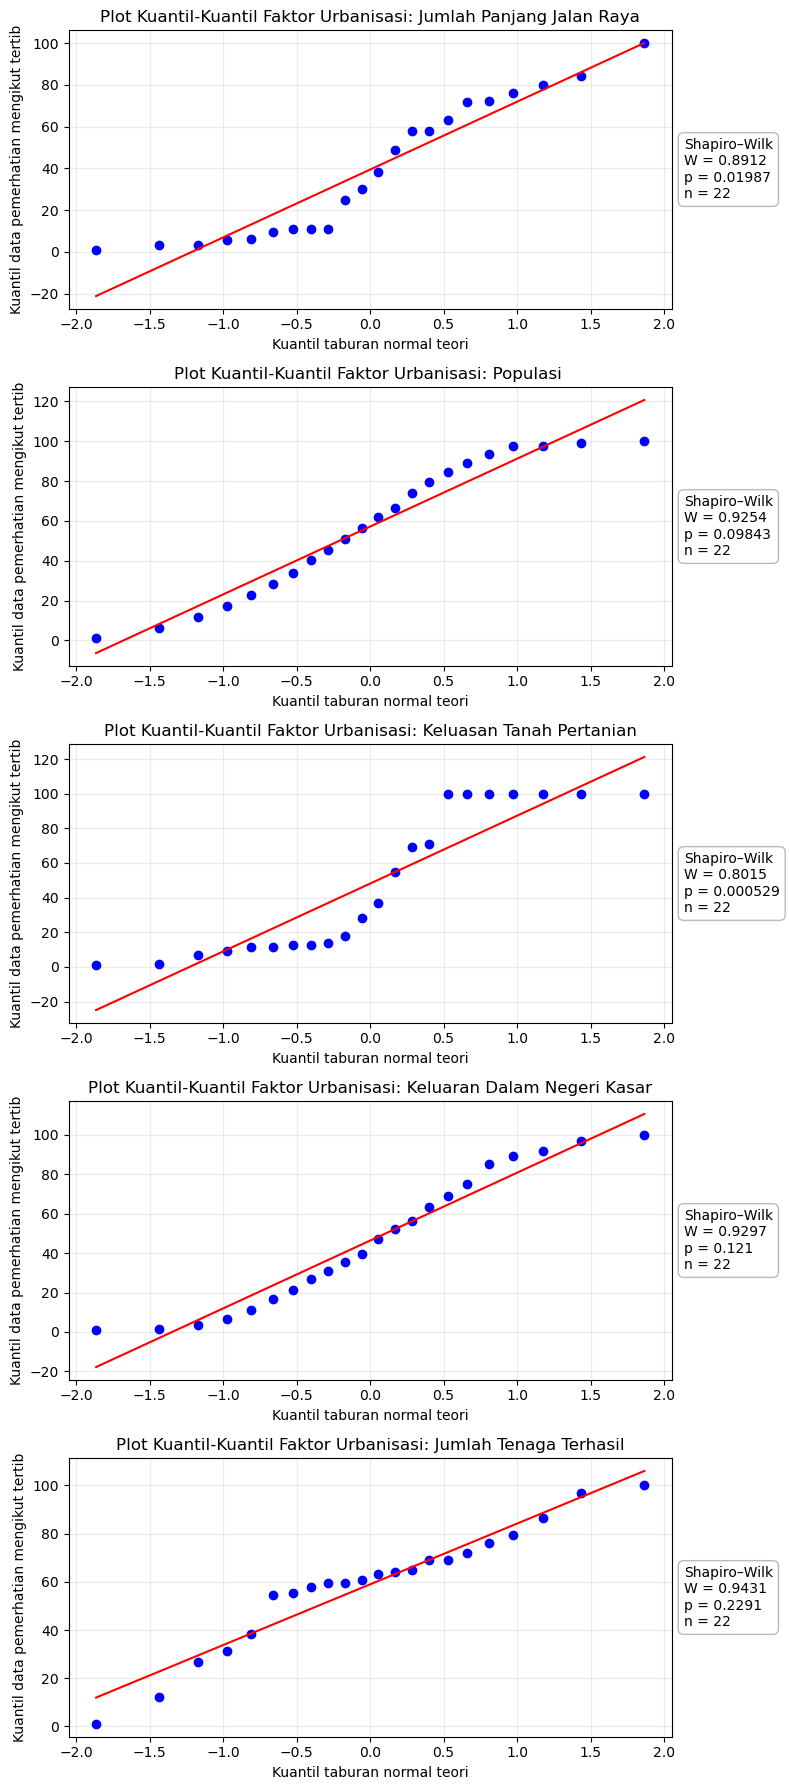


Shapiro-Wilk Results (sorted by p-value):
                   Variable        W  p_value  n
   Keluasan Tanah Pertanian 0.801542 0.000529 22
  Jumlah Panjang Jalan Raya 0.891174 0.019874 22
                  Populasi  0.925404 0.098429 22
Keluaran Dalam Negeri Kasar 0.929715 0.121032 22
     Jumlah Tenaga Terhasil 0.943091 0.229106 22

Saved: Normality Test shapiro wilk result.csv


In [8]:
#shapiro-wilk 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, probplot

# =========================
# 1) Load data
# =========================
DATA_PATH = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\standardized.csv"
df = pd.read_csv(DATA_PATH)

# =========================
# 2) Pick the 5 urbanization factors
#    (exclude Tahun and pelepasan karbon)
# =========================
exclude_cols = {"tahun", "pelepasan karbon"}  # case-insensitive matching

# find excluded columns robustly (ignore case / extra spaces)
lower_map = {c: c.strip().lower() for c in df.columns}
excluded_actual = [c for c in df.columns if lower_map[c] in exclude_cols]

# candidate columns = all numeric except excluded
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
factor_cols = [c for c in numeric_cols if c not in excluded_actual]

# If you truly have exactly 5 factors, this will pick them.
# Otherwise it will just take the first 5 numeric factor columns.
if len(factor_cols) < 5:
    raise ValueError(f"Found only {len(factor_cols)} numeric factor columns after exclusion: {factor_cols}")

factor_cols = factor_cols[:5]
print("Urbanization factors used (5):", factor_cols)

# =========================
# 3) Shapiro-Wilk + Q-Q plots
# =========================
results = []

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 18))
if len(factor_cols) == 1:
    axes = [axes]

for ax, col in zip(axes, factor_cols):
    x = df[col].dropna()

    # Shapiro-Wilk (note: SciPy is recommended for n <= 5000, but it still runs for larger n)
    stat, p = shapiro(x)
    results.append({"Variable": col, "W": stat, "p_value": p, "n": len(x)})

    # Q-Q plot
    probplot(x, dist="norm", plot=ax)
    ax.set_title(f"Plot Kuantil-Kuantil Faktor Urbanisasi: {col}")
    ax.set_xlabel("Kuantil taburan normal teori")
    ax.set_ylabel("Kuantil data pemerhatian mengikut tertib")
    ax.grid(True, alpha=0.25)

    # Put Shapiro-Wilk metric on the RIGHT side of the plot
    txt = f"Shapiro–Wilk\nW = {stat:.4f}\np = {p:.4g}\nn = {len(x)}"
    ax.text(
        1.02, 0.50, txt,
        transform=ax.transAxes,
        va="center", ha="left",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.9, edgecolor="0.7")
    )

plt.tight_layout()
plt.savefig("Normality Test Q-Q Plot latest.png", dpi=300, bbox_inches="tight")
plt.show()

# =========================
# 4) Output Shapiro table
# =========================
res_df = pd.DataFrame(results).sort_values("p_value")
print("\nShapiro-Wilk Results (sorted by p-value):")
print(res_df.to_string(index=False))

# Optional: save results
res_df.to_csv("Normality Test shapiro wilk result.csv", index=False)
print("\nSaved: Normality Test shapiro wilk result.csv")


In [53]:
#ANALISIS OBJEKTIF 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Read the data
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\standardized(1).csv"
df = pd.read_csv(file_path)

# Display basic info about the data
print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())


Data Overview:
   tahun  Jumlah Panjang Jalan Raya  Populasi   Keluasan Tanah Pertanian  \
0   2000                   1.000000   1.000000                  1.000000   
1   2001                   3.264217   6.439560                  1.503400   
2   2002                   3.425007  11.879121                  6.992281   
3   2003                   5.523694  17.318681                 11.767910   
4   2004                   5.975038  22.758242                 12.705569   

   Keluaran Dalam Negeri Kasar  Jumlah Tenaga Terhasil  \
0                     1.316337                1.000000   
1                     1.000000               12.177419   
2                     3.535499               26.548387   
3                     6.478379               31.338710   
4                    11.053683               38.524194   

   Pelepasan Karbon (tons)  
0                129341320  
1                136259070  
2                144802660  
3                153536630  
4                166562270  

Data

In [54]:
# Set tahun as index for time series plotting
df.set_index('tahun', inplace=True)

In [55]:
# Create a single figure with all variables
plt.figure(figsize=(14, 10))


<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

In [56]:
# list of column yang termasuk
columns = df.columns
print(columns)

Index(['Jumlah Panjang Jalan Raya', 'Populasi ', 'Keluasan Tanah Pertanian',
       'Keluaran Dalam Negeri Kasar', 'Jumlah Tenaga Terhasil',
       'Pelepasan Karbon (tons)'],
      dtype='object')


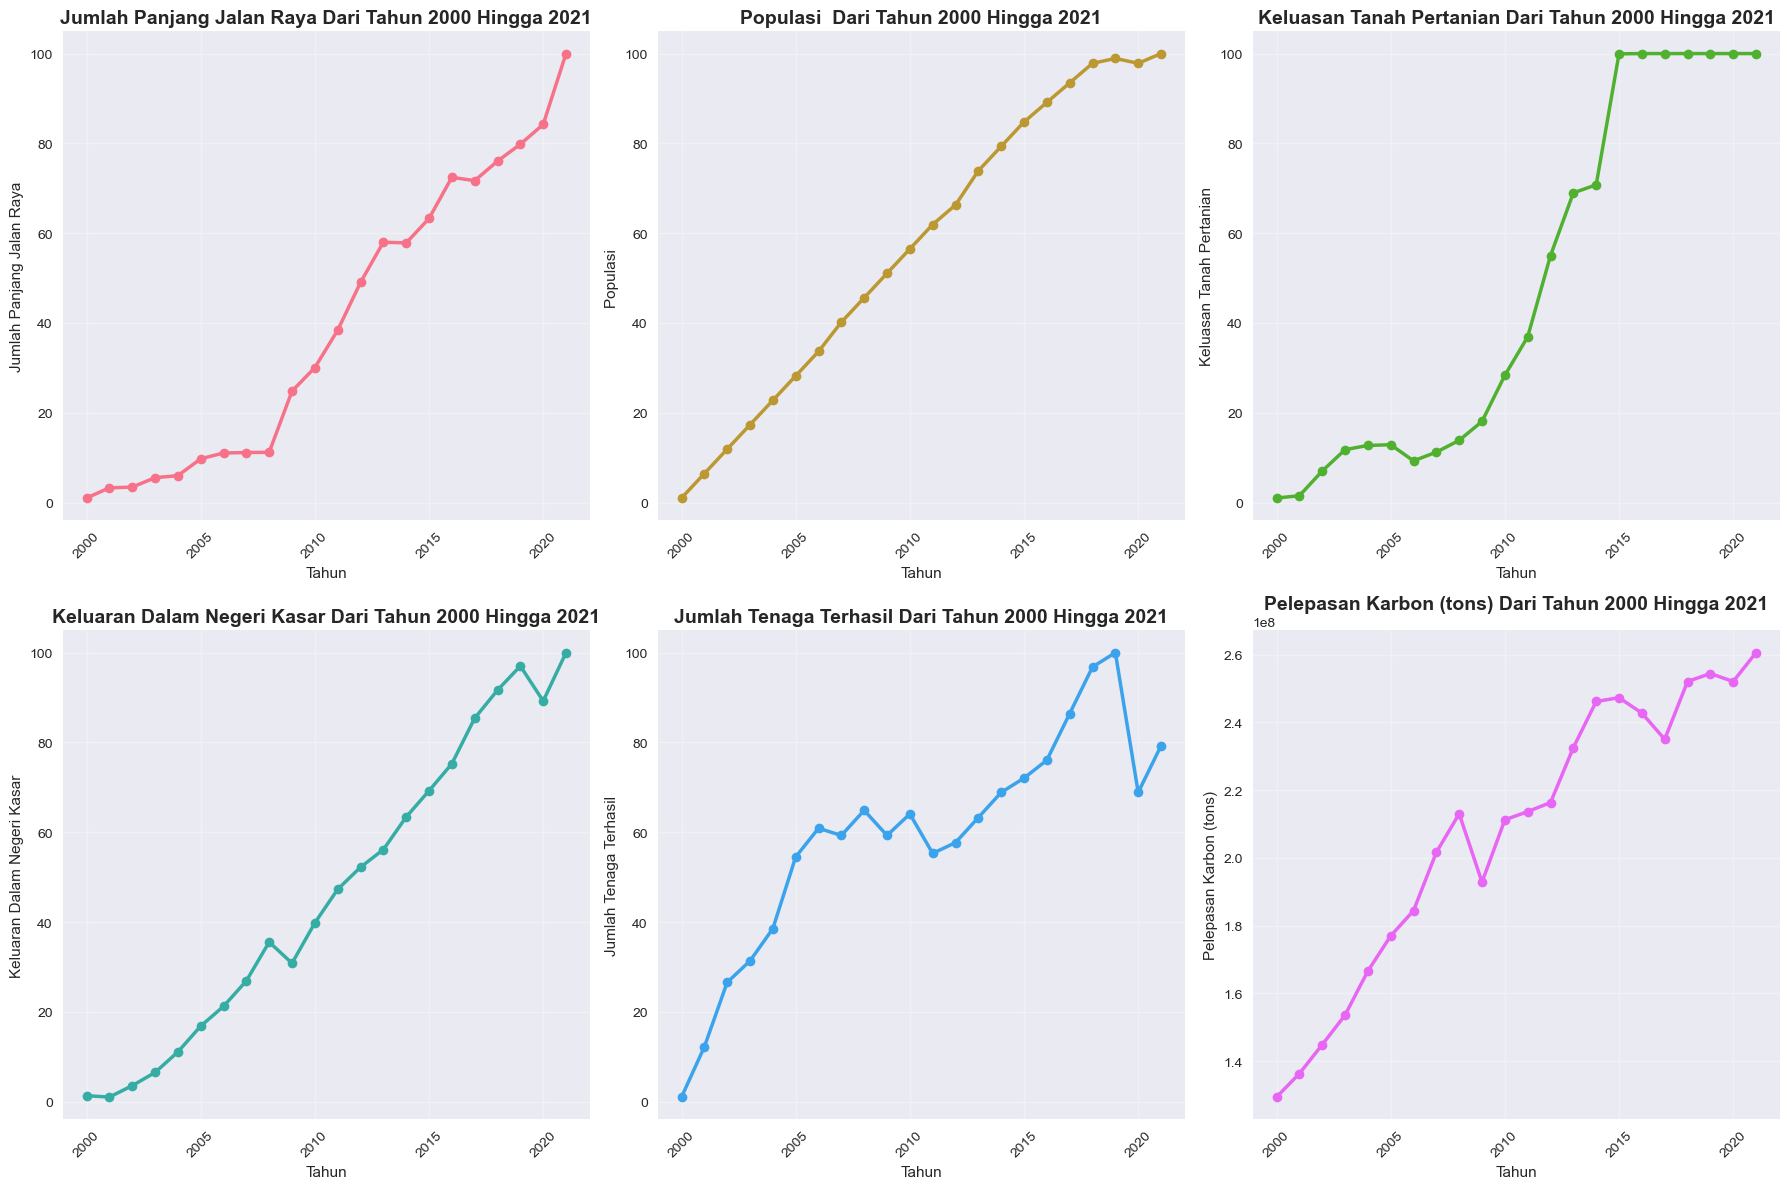

In [57]:
# Create individual subplots for each variable
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, column in enumerate(columns):
    axes[i].plot(df.index, df[column], marker='o', linewidth=2.5, color=f'C{i}')
    axes[i].set_title(f'{column} Dari Tahun 2000 Hingga 2021', fontsize=14, fontweight='bold')
    axes[i].set_xlabel('Tahun')
    axes[i].set_ylabel(column)
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [58]:
# Create and save individual plots for each variable
for i, column in enumerate(columns):
    plt.figure(figsize=(8, 6))
    plt.plot(df.index, df[column], marker='o', linewidth=2.5, color=f'C{i}')
    plt.title(f'{column} Dari Tahun 2000 Hingga 2021', fontsize=14, fontweight='bold')
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(df.index, rotation=45)
    plt.tight_layout()
    
    # --- Save each plot as a separate image file ---
    filename = f"{column.replace(' ', '_').lower()}_2000_2021.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.close()  # close the figure to avoid overlap in memory

print("✅ All individual plots have been saved successfully!")


✅ All individual plots have been saved successfully!


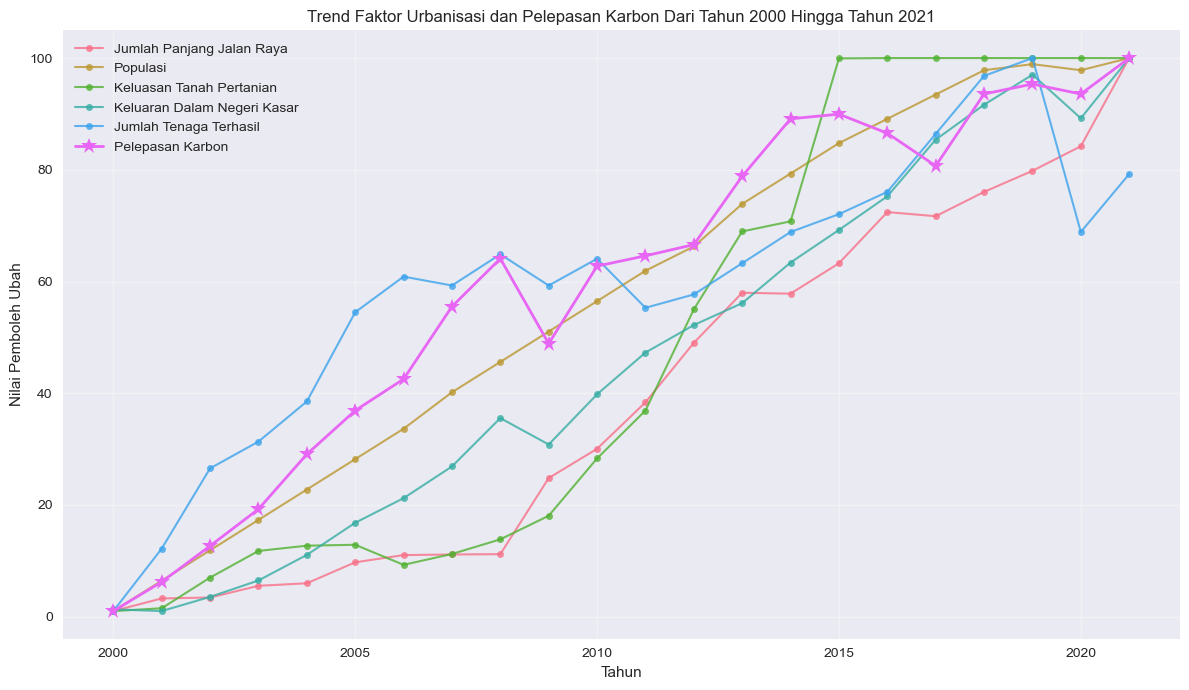

In [64]:
#graf siri masa keseluruhan 
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\Allstandardize.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

year_col = 'tahun'
y_var    = 'Pelepasan Karbon'   # your dependent variable

# All numeric variables except tahun
var_cols = [c for c in df.columns if c != year_col]

plt.figure(figsize=(12, 7))

for col in var_cols:
    if col == y_var:
        # y variable → STAR marker
        plt.plot(
            df[year_col], df[col],
            marker='*', markersize=12, linestyle='-',
            linewidth=2,
            label=col
        )
    else:
        # other variables → circle marker
        plt.plot(
            df[year_col], df[col],
            marker='o', markersize=5, linestyle='-',
            linewidth=1.5,
            alpha=0.8,
            label=col
        )

plt.xlabel("Tahun")
plt.ylabel("Nilai Pemboleh Ubah")
plt.title("Trend Faktor Urbanisasi dan Pelepasan Karbon Dari Tahun 2000 Hingga Tahun 2021")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("Graf Siri Masa Keseluruhan", dpi=300, bbox_inches="tight")
plt.show()


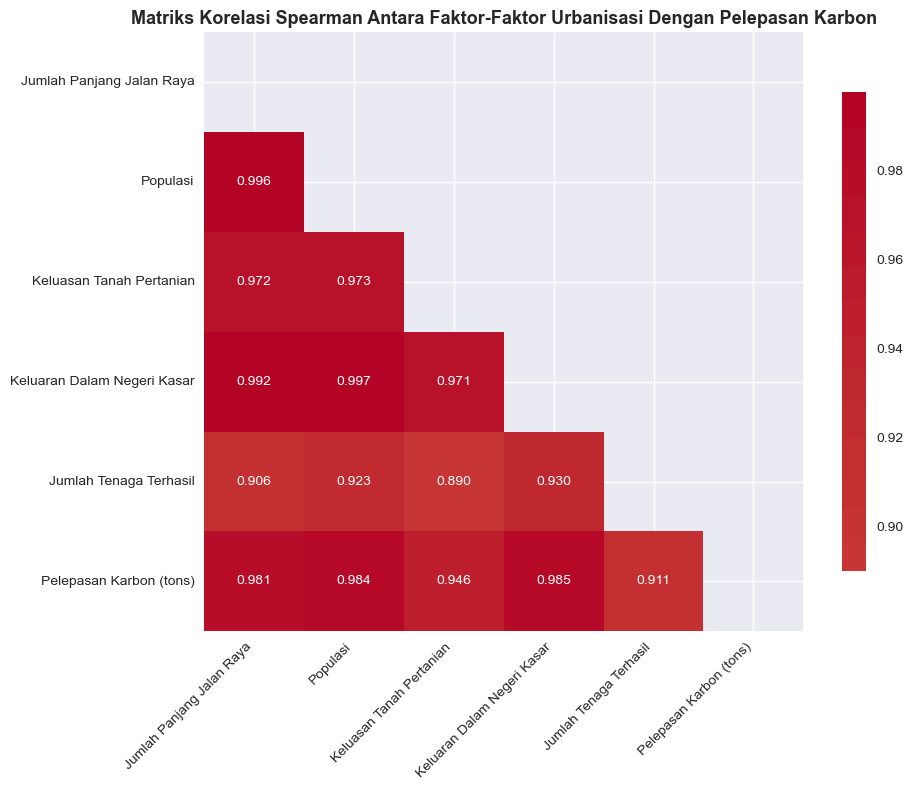

In [60]:
#Analisis Objektif 2: Analisis Korelasi Spearman

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\standardized(1).csv"
df = pd.read_csv(file_path)

# Clean up column names
df.columns = df.columns.str.strip()

# Drop non-numeric column
df_corr = df.drop(columns=['tahun'])

# === 2. Compute Spearman correlation ===
spearman_corr = df_corr.corr(method='spearman')

# === 3. Mask upper triangle ===
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# === 4. Plot the heatmap (lower triangle only, with gridlines) ===
plt.figure(figsize=(10, 8))

sns.heatmap(
    spearman_corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".3f",
    square=True,
    linewidths=0,     # Grid lines more visible
    linecolor='black',  # Dark grid colour
    cbar_kws={"shrink": 0.8}
)

plt.title("Matriks Korelasi Spearman Antara Faktor-Faktor Urbanisasi Dengan Pelepasan Karbon",
          fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# === 5. Save the plot ===
plt.savefig("spearman_correlation_lower_triangle.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
#test guna original data y combines w standardized data

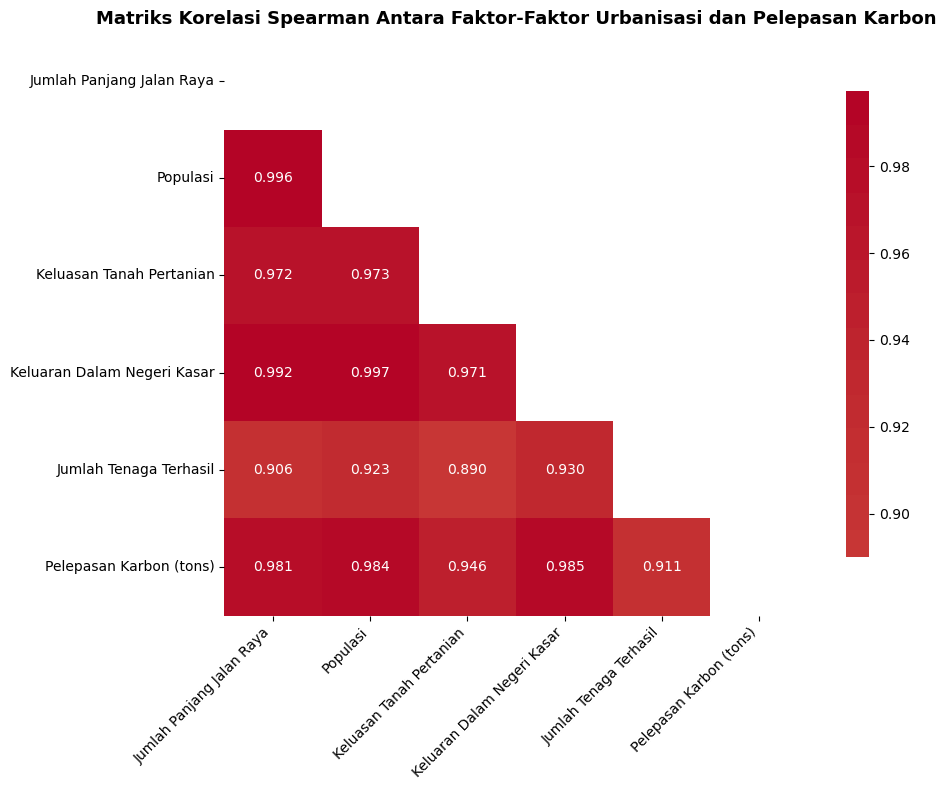

In [14]:
#Analisis Objektif 2: Analisis Korelasi Spearman

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load dataset ===
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\standardized(1).csv"
df = pd.read_csv(file_path)

# Clean up column names
df.columns = df.columns.str.strip()

# Drop non-numeric column
df_corr = df.drop(columns=['tahun'])

# === 2. Compute Spearman correlation ===
spearman_corr = df_corr.corr(method='spearman')

# === 3. Mask upper triangle ===
mask = np.triu(np.ones_like(spearman_corr, dtype=bool))

# === 4. Plot the heatmap (lower triangle only, with gridlines) ===
plt.figure(figsize=(10, 8))

sns.heatmap(
    spearman_corr,
    mask=mask,
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt=".3f",
    square=True,
    linewidths=0,     # Grid lines more visible
    linecolor='black',  # Dark grid colour
    cbar_kws={"shrink": 0.8}
)

plt.title("Matriks Korelasi Spearman Antara Faktor-Faktor Urbanisasi dan Pelepasan Karbon",
          fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

# === 5. Save the plot ===
plt.savefig("spearman_correlation_lower_triangle data asal Y.png", dpi=300, bbox_inches='tight')
plt.show()


Predictor variables used for VIF:
['Jumlah Panjang Jalan Raya', 'Populasi', 'Keluasan Tanah Pertanian', 'Keluaran Dalam Negeri Kasar', 'Jumlah Tenaga Terhasil', 'Pelepasan Karbon (tons)']

2. ANALISIS VIF

7. EXPORTING RESULTS

Multicollinearity Analysis Results:
                      Variable          Mean           Std      VIF  Tolerance
0    Jumlah Panjang Jalan Raya  3.944400e+01  3.240900e+01   71.851      0.014
1                     Populasi  5.717600e+01  3.328500e+01  132.400      0.008
2     Keluasan Tanah Pertanian  4.814300e+01  4.094100e+01   21.292      0.047
3  Keluaran Dalam Negeri Kasar  4.642000e+01  3.357900e+01   79.038      0.013
4       Jumlah Tenaga Terhasil  5.895600e+01  2.472700e+01   13.524      0.074
5      Pelepasan Karbon (tons)  2.074252e+08  4.156337e+07   36.170      0.028
✓ Multicollinearity analysis saved to: C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\multicollinearityAnalysis.csv


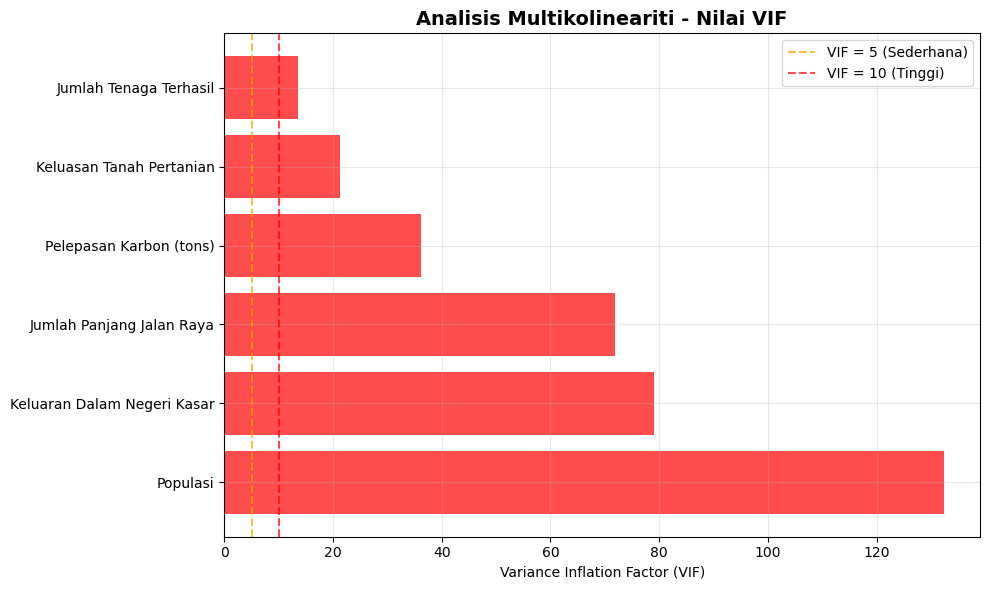

In [15]:
# 2. Multicollinearity Analysis & VARIANCE INFLATION FACTOR (VIF) ANALYSIS
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import os

# === Load data ===
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\standardized(1).csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

# === Define predictor variables X ===
X = df.drop(columns=['tahun', 'Pelepasan Karbon'], errors='ignore')

print("Predictor variables used for VIF:")
print(list(X.columns))

print("\n" + "="*60)
print("2. ANALISIS VIF")
print("="*60)

# Add constant
X_with_const = add_constant(X)

# --- Compute VIF (UNSORTED, to match X.columns) ---
vif_data = pd.DataFrame({
    "Variable": X.columns,
    "VIF": [
        variance_inflation_factor(X_with_const.values, i + 1)
        for i in range(len(X.columns))
    ]
})

# === 7. CREATE RESULTS DATAFRAME AND SAVE ===
print("\n" + "="*60)
print("7. EXPORTING RESULTS")
print("="*60)

results_df = pd.DataFrame({
    'Variable': vif_data["Variable"],
    'Mean': X.mean().values,
    'Std': X.std().values,
    'VIF': vif_data['VIF'].values,
    'Tolerance': 1 / vif_data['VIF'].values
})

print("\nMulticollinearity Analysis Results:")
print(results_df.round(3))

# Save to CSV (same folder as input file)
base_dir = os.path.dirname(file_path)
results_path = os.path.join(base_dir, "multicollinearityAnalysis.csv")
results_df.to_csv(results_path, index=False, encoding='utf-8-sig')
print(f"✓ Multicollinearity analysis saved to: {results_path}")

# --- For plotting, use a SORTED COPY of VIF ---
vif_plot = vif_data.sort_values("VIF", ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
colors = [
    "red" if v > 10 else "orange" if v > 5 else "green"
    for v in vif_plot["VIF"]
]
ax.barh(vif_plot["Variable"], vif_plot["VIF"], color=colors, alpha=0.7)

ax.axvline(x=5, color="orange", linestyle="--", alpha=0.7, label="VIF = 5 (Sederhana)")
ax.axvline(x=10, color="red", linestyle="--", alpha=0.7, label="VIF = 10 (Tinggi)")

ax.set_xlabel("Variance Inflation Factor (VIF)")
ax.set_title("Analisis Multikolineariti - Nilai VIF", fontsize=14, fontweight="bold")
ax.legend()
ax.grid(True, alpha=0.3)
fig.tight_layout()

fig.savefig("analisis_vif_multikolineariti.png", dpi=300, bbox_inches="tight")
plt.show()


Columns used (B–F): ['Jumlah Panjang Jalan Raya', 'Populasi ', 'Keluasan Tanah Pertanian', 'Keluaran Dalam Negeri Kasar', 'Jumlah Tenaga Terhasil']
Shape: (22, 5)

1) Covariance Matrix:
                              Jumlah Panjang Jalan Raya    Populasi   \
Jumlah Panjang Jalan Raya                  1050.359366  1039.585818   
Populasi                                   1039.585818  1107.866821   
Keluasan Tanah Pertanian                   1292.592734  1292.163056   
Keluaran Dalam Negeri Kasar                1064.942477  1102.131723   
Jumlah Tenaga Terhasil                      632.698837   742.661683   

                             Keluasan Tanah Pertanian  \
Jumlah Panjang Jalan Raya                 1292.592734   
Populasi                                  1292.163056   
Keluasan Tanah Pertanian                  1676.130783   
Keluaran Dalam Negeri Kasar               1319.817113   
Jumlah Tenaga Terhasil                     796.462621   

                             Keluaran Dalam

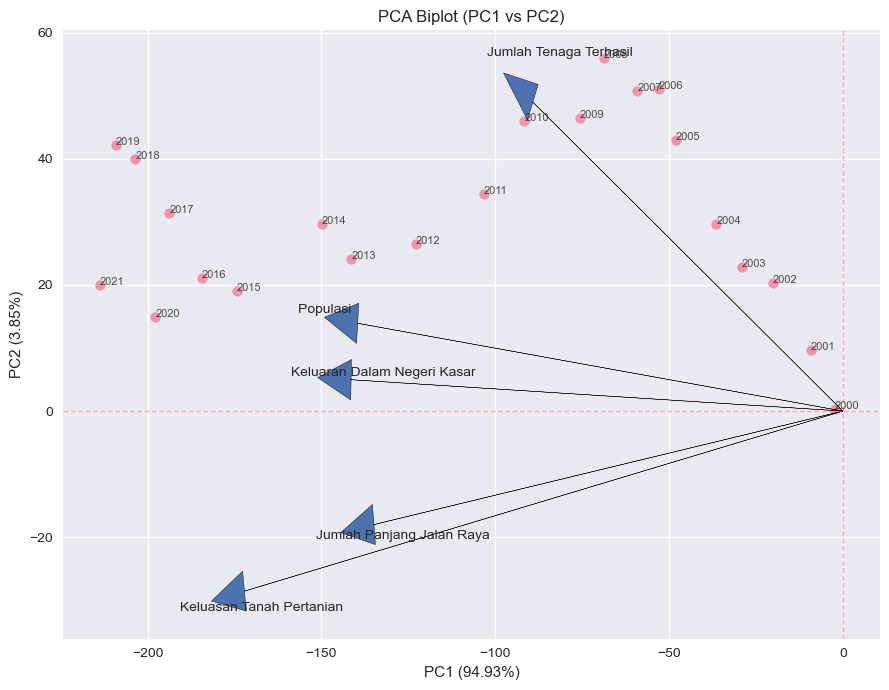


(Extra) Explained variance:
     PC  Explained Variance Ratio  Explained Variance (%)  \
0  PC1                  0.949321               94.932144   
1  PC2                  0.038520                3.851979   
2  PC3                  0.008253                0.825322   
3  PC4                  0.002459                0.245943   
4  PC5                  0.001446                0.144613   

   Cumulative Variance (%)  
0                94.932144  
1                98.784123  
2                99.609445  
3                99.855387  
4               100.000000  


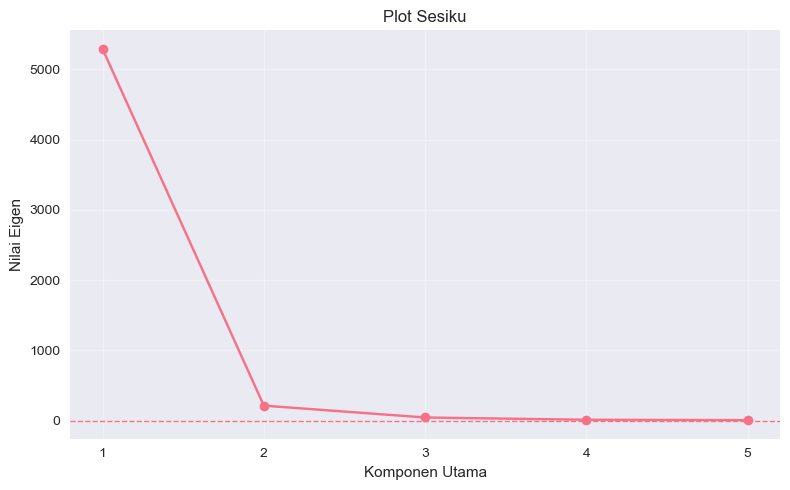

In [72]:
# PCA
#PCA MANUAL PART 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ==========================================================
# PCA MANUAL STEPS (Covariance -> Eigenvalues/Vectors -> PCs)
# Using your standardized.csv, columns B–F (2nd to 6th columns)
# ==========================================================

# 0) Load file
CSV_PATH = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\standardized(1).csv"   # if running locally, change to your full path
df = pd.read_csv(CSV_PATH)

# Select columns B–F (2nd to 6th columns)
X = df.iloc[:, 1:6].copy()
X_values = X.values

print("Columns used (B–F):", list(X.columns))
print("Shape:", X.shape)

# ----------------------------------------------------------
# 1) Covariance matrix
# (rows = observations, columns = variables)
# np.cov uses columns as variables when rowvar=False
# ----------------------------------------------------------
cov_matrix = np.cov(X_values, rowvar=False, ddof=1)
cov_df = pd.DataFrame(cov_matrix, index=X.columns, columns=X.columns)
print("\n1) Covariance Matrix:\n", cov_df)
cov_df.to_csv("Manual Covariance Matrix.csv")

# 3) Eigenvectors for each eigenvalue
# ----------------------------------------------------------
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort eigenvalues/eigenvectors (descending)
idx = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[idx]
eigenvectors_sorted = eigenvectors[:, idx]

eigval_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(eigenvalues_sorted))],
    "Eigenvalue": eigenvalues_sorted
})
print("\n2) Eigenvalues (sorted):\n", eigval_df)
eigval_df.to_csv("Manual Nilai Eigen.csv", index=False)

# ----------------------------------------------------------
# Eigenvectors table (each column is eigenvector for PC1..PC5)
eigvec_df = pd.DataFrame(
    eigenvectors_sorted,
    index=X.columns,
    columns=[f"PC{i+1}_eigenvector" for i in range(eigenvectors_sorted.shape[1])]
)
print("\n3) Eigenvectors (sorted; columns correspond to PCs):\n", eigvec_df)
eigvec_df.to_csv("Manual EigenVector.csv")

feature_names = X.columns.tolist()

loadings = eigenvectors_sorted * np.sqrt(eigenvalues_sorted)

loading_df = pd.DataFrame(
    loadings,
    index=feature_names,
    columns=[f"PC{i+1}" for i in range(loadings.shape[1])]
)

print(loading_df)

# =========================
# 3B) Key contributors table (Top N loadings per PC)
# =========================
top_n = 5  # change if you want top 2 / top 4 etc.

# Convert loadings matrix to long format: PC, Variable, Loading
loading_long = (
    loading_df
    .reset_index()
    .rename(columns={"index": "Variable"})
    .melt(id_vars="Variable", var_name="PC", value_name="Loading")
)

# Absolute loading
loading_long["Absolute Loading"] = loading_long["Loading"].abs()

# Take top N per PC based on absolute loading
key_contributors = (
    loading_long
    .sort_values(["PC", "Absolute Loading"], ascending=[True, False])
    .groupby("PC", as_index=False)
    .head(top_n)
    .loc[:, ["PC", "Variable", "Loading", "Absolute Loading"]]
    .reset_index(drop=True)
)

print("\nKey contributors (Top", top_n, "per PC):\n", key_contributors)

# Save CSV
key_contributors.to_csv("manualPCA_keycontrributor.csv", index=False)
print("\n✅ Saved: manualPCA_keycontrributor.csv")

# =========================================================
# 4) New dataset PC1–PC5 using linear combination
# Scores = X_centered @ eigenvectors_sorted
# =========================================================
scores = X.values @ eigenvectors_sorted
pc_cols = [f"PC{i+1}" for i in range(scores.shape[1])]
pc_df = pd.DataFrame(scores, columns=pc_cols)

# (Optional) attach reference columns if you have them (e.g., tahun)
if "tahun" in df.columns:
    pc_df.insert(0, "tahun", df["tahun"].values)

print("\n4) New PCA dataset (PC1–PC5) head:\n", pc_df.head())
pc_df.to_csv("Manual PC Score(1).csv", index=False)

# ----------------------------------------------------------
# 5) Biplot (PC1 vs PC2): Scores + Loadings
# ----------------------------------------------------------

# 5A) Get scores for PC1 and PC2
pc1_scores = pc_df["PC1"].values
pc2_scores = pc_df["PC2"].values

# 5B) Get loadings for PC1 and PC2 (from loading_df)
# (rows = variables, columns = PCs)
load_pc1 = loading_df["PC1"].values
load_pc2 = loading_df["PC2"].values

# 5C) Scale arrows to match score space (so arrows are visible)
# Avoid divide-by-zero edge cases
score_max = max(np.max(np.abs(pc1_scores)), np.max(np.abs(pc2_scores)))
loading_max = max(np.max(np.abs(load_pc1)), np.max(np.abs(load_pc2)))

arrow_scale = 0.85 * score_max / loading_max if loading_max != 0 else 1.0

plt.figure(figsize=(9, 7))

# --- Scatter scores (observations) ---
plt.scatter(pc1_scores, pc2_scores, alpha=0.7)

# Optional: label points by year if "tahun" exists
if "tahun" in pc_df.columns:
    for x, y, yr in zip(pc1_scores, pc2_scores, pc_df["tahun"].values):
        plt.text(x, y, str(yr), fontsize=8, alpha=0.8)

# --- Draw loading arrows (variables) ---
for i, var in enumerate(feature_names):
    x_arrow = load_pc1[i] * arrow_scale
    y_arrow = load_pc2[i] * arrow_scale

    plt.arrow(
        0, 0, x_arrow, y_arrow,
        head_width=0.03 * score_max,
        length_includes_head=True
    )
    plt.text(
        x_arrow * 1.05, y_arrow * 1.05,
        var, fontsize=10
    )

# --- Axis lines ---
plt.axhline(0, linewidth=1, linestyle="--", alpha=0.6)
plt.axvline(0, linewidth=1, linestyle="--", alpha=0.6)

# --- Labels with explained variance (optional but nice for thesis) ---
explained_pc1 = explained_ratio[0] * 100
explained_pc2 = explained_ratio[1] * 100

plt.xlabel(f"PC1 ({explained_pc1:.2f}%)")
plt.ylabel(f"PC2 ({explained_pc2:.2f}%)")
plt.title("PCA Biplot (PC1 vs PC2)")

plt.tight_layout()
plt.savefig("manual_pca_biplot_pc1_pc2.png", dpi=300)
plt.show()


# Extra: explained variance ratio (from eigenvalues)
explained_ratio = eigenvalues_sorted / eigenvalues_sorted.sum()
explained_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_ratio))],
    "Explained Variance Ratio": explained_ratio,
    "Explained Variance (%)": explained_ratio * 100,
    "Cumulative Variance (%)": np.cumsum(explained_ratio) * 100
})
explained_df.to_csv("Manual variance explained.csv", index=False)
print("\n(Extra) Explained variance:\n", explained_df)


# ----------------------------------------------------------
# Scree Plot (using sorted eigenvalues)
# ----------------------------------------------------------

pcs = np.arange(1, len(eigenvalues_sorted) + 1)

plt.figure(figsize=(8, 5))
plt.plot(pcs, eigenvalues_sorted, marker='o', linestyle='-')
plt.xlabel("Komponen Utama")
plt.ylabel("Nilai Eigen")
plt.title("Plot Sesiku")
plt.xticks(pcs)
plt.grid(True, alpha=0.3)

# Kaiser criterion line (eigenvalue = 1)
plt.axhline(y=1, linestyle='--', linewidth=1)

plt.tight_layout()
plt.savefig("pca_scree_plot.png", dpi=300)
plt.show()


In [ ]:
#ANALISIS OBJEKTIF 3: expanding rolling window validation for MLR

In [8]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# --- Load PCA data ---
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\Objective4(1).xlsx"
df = pd.read_excel(file_path)


YEAR_COL   = 'tahun'
X1_COL     = 'PC1'
X2_COL     = 'PC2'
Y_COL      = 'Pelepasan Karbon (tons)'

# Keep only 2000–2021 (if extra years exist)
df = df[(df[YEAR_COL] >= 2000) & (df[YEAR_COL] <= 2021)].copy()

# Sort by year to respect time order
df = df.sort_values(by=YEAR_COL).reset_index(drop=True)

print(df[[YEAR_COL, X1_COL, X2_COL, Y_COL]])
print("Total observations:", len(df))

#Data splitting
train_start_year = 2000
train_end_year   = 2017
test_start_year  = 2018

train_mask = (df[YEAR_COL] >= train_start_year) & (df[YEAR_COL] <= train_end_year)
test_mask  = (df[YEAR_COL] >= test_start_year)

df_train = df[train_mask].copy()
df_test  = df[test_mask].copy()

print("Train years:", df_train[YEAR_COL].tolist())
print("Test years :", df_test[YEAR_COL].tolist())
print("Train size:", len(df_train), "| Test size:", len(df_test))



    tahun         PC1        PC2  Pelepasan Karbon (tons)
0    2000   -2.343640   0.390502                129341320
1    2001   -9.227541   9.097178                136259070
2    2002  -20.445198  20.177397                144802660
3    2003  -29.081610  22.263730                153536630
4    2004  -36.398094  29.165709                166562270
5    2005  -47.980994  42.578460                176927340
6    2006  -52.965754  50.629672                184400160
7    2007  -59.238688  50.539795                201614920
8    2008  -68.765804  55.796346                212999830
9    2009  -75.684710  46.203283                192823830
10   2010  -91.511886  45.438211                211214610
11   2011 -103.160029  33.833733                213658320
12   2012 -122.827469  25.999698                216315670
13   2013 -141.310001  23.452083                232549980
14   2014 -149.792948  29.259301                246167920
15   2015 -174.407586  18.839848                247282700
16   2016 -184

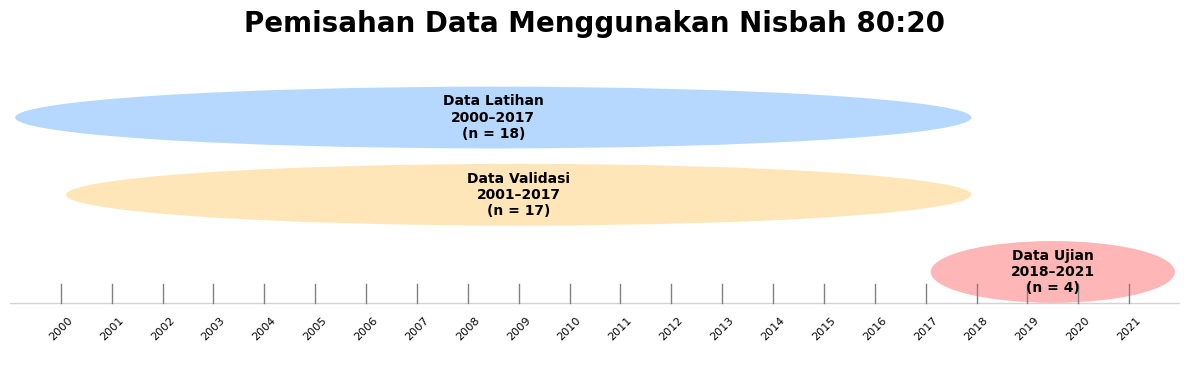

Image saved as train_val_test_split_visual.png


In [9]:
#create data splitting timeline
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# ---------------- DATA ----------------
train_years = list(range(2000, 2018))   # 2000–2017
val_years   = list(range(2001, 2018))   # 2001–2017 (rolling-origin validation years)
test_years  = list(range(2018, 2022))   # 2018–2021
all_years   = train_years + test_years

# ---------------- FIGURE ----------------
fig, ax = plt.subplots(figsize=(12, 4))

# Timeline baseline at y = 0
ax.axhline(0, color='lightgray', lw=1, zorder=0)

# ---------------- OVAL FUNCTION ----------------
def add_band(years, y, height, color, alpha=0.55, edgecolor="none"):
    center_x = (years[0] + years[-1]) / 2
    width = len(years) + 0.8   # extend a bit beyond first & last year
    ell = Ellipse(
        (center_x, y),
        width=width,
        height=height,
        facecolor=color,
        edgecolor=edgecolor,
        alpha=alpha,
        zorder=1,
    )
    ax.add_patch(ell)
    return center_x

# ---------------- BANDS ----------------
# Train band (top)
train_center = add_band(train_years, y=1.2, height=0.40, color="#7ab8ff")

# Validation band (middle)
val_center   = add_band(val_years,   y=0.7, height=0.40, color="#ffd27f")

# Test band (bottom, above baseline)
test_center  = add_band(test_years,  y=0.2, height=0.40, color="#ff7a7a")

# ---------------- LABELS INSIDE BANDS ----------------
ax.text(train_center, 1.2,
        f"Data Latihan\n2000–2017\n(n = {len(train_years)})",
        ha="center", va="center", fontsize=10, weight="bold")

ax.text(val_center, 0.7,
        f"Data Validasi\n2001–2017\n(n = {len(val_years)})",
        ha="center", va="center", fontsize=10, weight="bold")

ax.text(test_center, 0.2,
        f"Data Ujian\n2018–2021\n(n = {len(test_years)})",
        ha="center", va="center", fontsize=10, weight="bold")

# ---------------- YEAR TICKS ALONG BASELINE ----------------
for yr in all_years:
    ax.plot([yr, yr], [0, 0.12], color="gray", lw=1, zorder=2)
    ax.text(yr, -0.08, str(yr),
            ha="center", va="top", fontsize=8, rotation=45)

# ---------------- FINAL STYLING ----------------
ax.set_xlim(min(all_years) - 1, max(all_years) + 1)
ax.set_ylim(-0.5, 1.7)
ax.axis("off")

plt.title("Pemisahan Data Menggunakan Nisbah 80:20", fontsize=20, weight="bold")
plt.tight_layout()

# ---------------- SAVE FIGURE ----------------
plt.savefig("train_val_test_split_visual.png", dpi=300, bbox_inches='tight')
plt.show()

print("Image saved as train_val_test_split_visual.png")


In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd

# ---------- 1. Metric function ----------
def regression_metrics(y_true, y_pred, eps=1e-9):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    denom = np.maximum(np.abs(y_true), eps)
    mape = np.mean(np.abs((y_true - y_pred) / denom)) * 100
    return mse, rmse, mae, mape

# ---------- 2. Rolling-origin CV on TRAIN set ----------
years_train = sorted(df_train[YEAR_COL].unique())
print("Training years for CV:", years_train)

fold_results = []

for i in range(1, len(years_train)):
    val_year    = years_train[i]
    train_years = years_train[:i]
    
    fold_train = df_train[df_train[YEAR_COL].isin(train_years)]
    fold_val   = df_train[df_train[YEAR_COL] == val_year]
    
    X_train_fold = fold_train[[X1_COL, X2_COL]]
    y_train_fold = fold_train[Y_COL]
    
    X_val_fold = fold_val[[X1_COL, X2_COL]]
    y_val_fold = fold_val[Y_COL]
    
    model = LinearRegression()
    model.fit(X_train_fold, y_train_fold)
    
    y_val_pred_fold = model.predict(X_val_fold)
    mse, rmse, mae, mape = regression_metrics(y_val_fold, y_val_pred_fold)
    
    fold_results.append({
        "val_year": val_year,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape
    })

cv_df = pd.DataFrame(fold_results)
cv_df.to_csv("mlr_cv_results.csv", index=False)

print("\nRolling-Origin CV Results (Validation on Next Year):")
display(cv_df)

# ----------  Compute mean of each validation metric ----------
mean_metrics = {
    "mean_mse":  cv_df["mse"].mean(),
    "mean_rmse": cv_df["rmse"].mean(),
    "mean_mae":  cv_df["mae"].mean(),
    "mean_mape": cv_df["mape"].mean()
}

mean_metrics_df = pd.DataFrame([mean_metrics])
mean_metrics_df.to_csv("mlr_cv_mean_metrics.csv", index=False)

print("\n=== AVERAGE VALIDATION METRICS (Across Folds) ===")
print(mean_metrics_df)

# ---------- 3. Fit FINAL model on full training set ----------
X_train_final = df_train[[X1_COL, X2_COL]]
y_train_final = df_train[Y_COL]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train_final)

# Save coefficients
coef_df = pd.DataFrame({
    "parameter": ["Intercept", "b1_PC1", "b2_PC2"],
    "value": [final_model.intercept_,
              final_model.coef_[0],
              final_model.coef_[1]]
})

print("\nFinal model coefficients:")
print(coef_df)

# ---------- 3b. OLS-style diagnostics for sklearn LinearRegression ----------
from scipy import stats

def ols_diagnostics(X: pd.DataFrame, y: pd.Series, model: LinearRegression, alpha: float = 0.05):
    """
    Compute OLS-style diagnostics for a fitted sklearn LinearRegression:
    - Coeff table with std err, t, p, CI
    - ANOVA table (Regression/Residual/Total)
    - Model summary: R2, adj-R2, AIC, BIC, etc.
    """
    # Ensure numpy arrays
    y = np.asarray(y).reshape(-1, 1)
    Xm = np.column_stack([np.ones((X.shape[0], 1)), np.asarray(X)])  # add intercept
    n, k_plus_1 = Xm.shape        # k_plus_1 = p + 1 (intercept)
    p = k_plus_1 - 1              # number of predictors

    # Predictions & residuals
    y_hat = model.predict(X).reshape(-1, 1)
    resid = y - y_hat

    # Sums of squares
    y_mean = np.mean(y)
    SST = np.sum((y - y_mean) ** 2)                 # total
    SSE = np.sum(resid ** 2)                        # error (residual)
    SSR = SST - SSE                                 # regression

    # Degrees of freedom
    df_reg = p
    df_res = n - k_plus_1
    df_tot = n - 1

    # Mean squares & F
    MSR = SSR / df_reg if df_reg > 0 else np.nan
    MSE = SSE / df_res
    F_stat = MSR / MSE if df_reg > 0 else np.nan
    p_F = stats.f.sf(F_stat, df_reg, df_res) if df_reg > 0 else np.nan

    # Estimate variance of residuals
    sigma2 = MSE

    # (X'X)^(-1) for standard errors
    XtX_inv = np.linalg.inv(Xm.T @ Xm)
    coef_full = np.concatenate(([model.intercept_], model.coef_.ravel()))
    se = np.sqrt(np.diag(XtX_inv) * sigma2)

    # t-stats, p-values, confidence intervals
    t_stats = coef_full / se
    p_vals = 2 * stats.t.sf(np.abs(t_stats), df_res)
    t_crit = stats.t.ppf(1 - alpha/2, df=df_res)
    ci_lower = coef_full - t_crit * se
    ci_upper = coef_full + t_crit * se

    # Coefficients table
    terms = ["Intercept"] + list(X.columns)
    coef_table = pd.DataFrame({
        "term": terms,
        "coef": coef_full,
        "std_err": se,
        "t": t_stats,
        "p_value": p_vals,
        f"ci_{100*(1-alpha):.0f}%_lower": ci_lower,
        f"ci_{100*(1-alpha):.0f}%_upper": ci_upper
    })

    # R2 / adj-R2
    R2 = 1 - (SSE / SST)
    adj_R2 = 1 - (1 - R2) * (n - 1) / (n - k_plus_1)

    # AIC / BIC (Gaussian OLS)
    # loglik = -n/2*(log(2π) + 1 + log(SSE/n))
    loglik = -0.5 * n * (np.log(2 * np.pi) + 1 + np.log(SSE / n))
    AIC = 2 * k_plus_1 - 2 * loglik
    BIC = np.log(n) * k_plus_1 - 2 * loglik

    # Model summary dict
    model_summary = {
        "n": n,
        "p": p,
        "R2": R2,
        "adj_R2": adj_R2,
        "SSE": float(SSE),
        "SSR": float(SSR),
        "SST": float(SST),
        "MSE": float(MSE),
        "AIC": float(AIC),
        "BIC": float(BIC),
    }

    # ANOVA table (separate)
    anova_table = pd.DataFrame({
        "Source": ["Regression", "Residual", "Total"],
        "SS": [SSR, SSE, SST],
        "df": [df_reg, df_res, df_tot],
        "MS": [MSR, MSE, np.nan],
        "F": [F_stat, np.nan, np.nan],
        "p_value": [p_F, np.nan, np.nan],
    })

    return coef_table, anova_table, model_summary

# ----- RUN DIAGNOSTICS ON THE FINAL (TRAINING) MODEL -----
coef_table, anova_table, model_summary = ols_diagnostics(X_train_final, y_train_final, final_model)

print("\n=== COEFFICIENTS TABLE ===")
print(coef_table.to_string(index=False))

print("\n=== ANOVA TABLE ===")
print(anova_table.to_string(index=False))

print("\n=== MODEL SUMMARY ===")
for k, v in model_summary.items():
    print(f"{k}: {v}")

# (Optional) Save to CSV
coef_table.to_csv("coefficients_table.csv", index=False)
anova_table.to_csv("anova_table.csv", index=False)
pd.DataFrame([model_summary]).to_csv("model_summary.csv", index=False)


# ---------- 4. TRAINING metrics ----------
y_train_pred = final_model.predict(X_train_final)
mse_train, rmse_train, mae_train, mape_train = regression_metrics(y_train_final, y_train_pred)

train_metrics_df = pd.DataFrame([{
    "dataset": "training",
    "mse": mse_train,
    "rmse": rmse_train,
    "mae": mae_train,
    "mape": mape_train
}])
train_metrics_df.to_csv("mlr_training_metrics.csv", index=False)

print("\n=== TRAINING PERFORMANCE (2000–2017) ===")
print(train_metrics_df)

# ---------- 5. TEST metrics (2018–2021) ----------
X_test_final = df_test[[X1_COL, X2_COL]]
y_test_final = df_test[Y_COL]

y_test_pred = final_model.predict(X_test_final)
mse_test, rmse_test, mae_test, mape_test = regression_metrics(y_test_final, y_test_pred)

test_metrics_df = pd.DataFrame([{
    "dataset": "test",
    "mse": mse_test,
    "rmse": rmse_test,
    "mae": mae_test,
    "mape": mape_test
}])
test_metrics_df.to_csv("mlr_test_metrics.csv", index=False)

print("\n=== FINAL TEST PERFORMANCE (2018–2021) ===")
print(test_metrics_df)


Training years for CV: [np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017)]

Rolling-Origin CV Results (Validation on Next Year):


,val_year,mse,rmse,mae,mape
0,2001,4.785527e+13,6.917750e+06,6.917750e+06,5.076910
1,2002,1.463683e+12,1.209828e+06,1.209828e+06,0.835501
2,2003,6.108482e+13,7.815678e+06,7.815678e+06,5.090432
3,2004,4.569623e+13,6.759898e+06,6.759898e+06,4.058481
4,2005,6.385246e+12,2.526904e+06,2.526904e+06,1.428216
5,2006,1.378673e+13,3.713049e+06,3.713049e+06,2.013582
6,2007,1.521046e+14,1.233307e+07,1.233307e+07,6.117142
7,2008,3.270952e+13,5.719224e+06,5.719224e+06,2.685084
8,2009,1.330909e+15,3.648162e+07,3.648162e+07,18.919665
9,2010,4.638527e+13,6.810673e+06,6.810673e+06,3.224527



=== AVERAGE VALIDATION METRICS (Across Folds) ===
       mean_mse     mean_rmse      mean_mae  mean_mape
0  1.812335e+14  9.537046e+06  9.537046e+06   4.705186

Final model coefficients:
   parameter         value
0  Intercept  1.255910e+08
1     b1_PC1 -5.790686e+05
2     b2_PC2  6.813595e+05

=== COEFFICIENTS TABLE ===
     term          coef      std_err          t      p_value  ci_95%_lower  ci_95%_upper
Intercept  1.255910e+08 5.915134e+06  21.232142 1.324599e-12  1.129832e+08  1.381988e+08
      PC1 -5.790686e+05 3.680140e+04 -15.734963 9.862981e-11 -6.575089e+05 -5.006283e+05
      PC2  6.813595e+05 1.491895e+05   4.567074 3.704127e-04  3.633696e+05  9.993493e+05

=== ANOVA TABLE ===
    Source           SS  df           MS          F      p_value
Regression 2.395661e+16   2 1.197830e+16 137.527375 2.249493e-10
  Residual 1.306464e+15  15 8.709759e+13        NaN          NaN
     Total 2.526307e+16  17          NaN        NaN          NaN

=== MODEL SUMMARY ===
n: 18
p: 2
R2: 0

,Year,Actual,Predicted
0,2018,252064870,2.705406e+08
1,2019,254423360,2.752840e+08
2,2020,252065080,2.501696e+08
3,2021,260591310,2.625268e+08


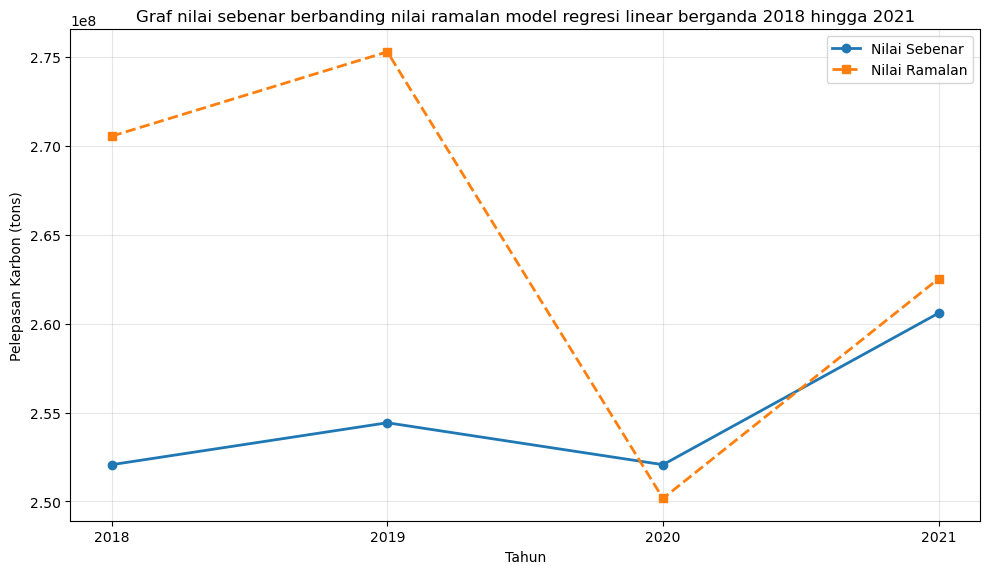

Saved:
- comparison_test_MLR.csv
- MLR_Actual_vs_Predicted_Test.png


In [19]:
comparison_test = pd.DataFrame({
    "Year": df_test[YEAR_COL].values,
    "Actual": y_test_final.values,
    "Predicted": y_test_pred
})

comparison_test = comparison_test.round(4)
display(comparison_test)

comparison_test.to_csv("comparison test MLR.csv", index=False)

import matplotlib.pyplot as plt
import pandas as pd

# =========================
# 2) Plot Actual vs Predicted
# =========================
plt.figure(figsize=(10, 6))

plt.plot(
    comparison_test["Year"],
    comparison_test["Actual"],
    marker="o",
    linewidth=2,
    label="Nilai Sebenar"
)

plt.plot(
    comparison_test["Year"],
    comparison_test["Predicted"],
    marker="s",
    linestyle="--",
    linewidth=2,
    label="Nilai Ramalan"
)

# 🔹 Force integer years on x-axis
plt.xticks(comparison_test["Year"].astype(int))

plt.xlabel("Tahun")
plt.ylabel("Pelepasan Karbon (tons)")
plt.title("Graf nilai sebenar berbanding nilai ramalan model regresi linear berganda 2018 hingga 2021")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("MLR_Actual_vs_Predicted_Test.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved:")
print("- comparison_test_MLR.csv")
print("- MLR_Actual_vs_Predicted_Test.png")



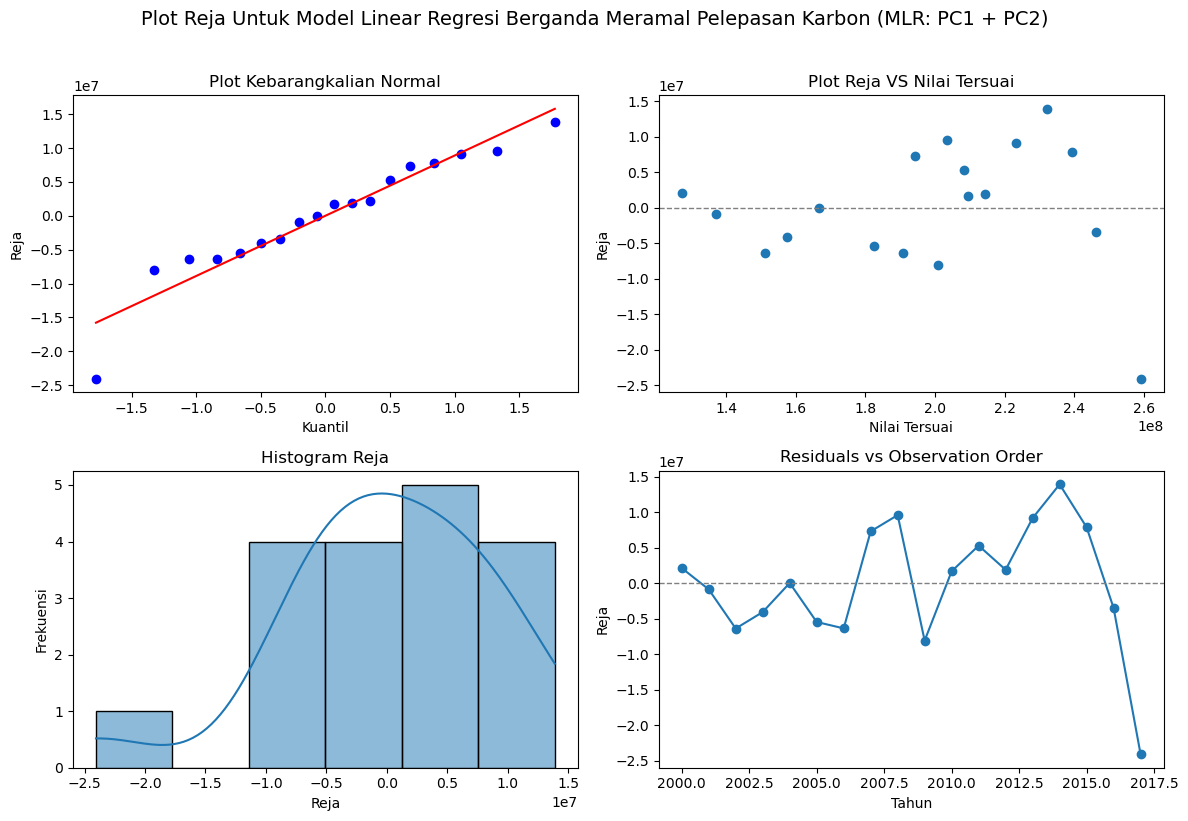

Residual diagnostic plot saved as: Diagnostik Reja Regresi Linear.png


In [12]:
#model residual diagnostic plot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# =========================
# 1. Get fitted values & residuals (TRAINING DATA)
# =========================
X_train_final = df_train[[X1_COL, X2_COL]]
y_train_final = df_train[Y_COL].values
years_train   = df_train[YEAR_COL].values

y_train_pred = final_model.predict(X_train_final)
residuals    = y_train_final - y_train_pred

# =========================
# 2. Residual diagnostic plots
# =========================
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Plot Reja Untuk Model Linear Regresi Berganda Meramal Pelepasan Karbon (MLR: PC1 + PC2)", fontsize=14, y=1.02)

# ---- (a) Normal Probability Plot (QQ plot) ----
ax = axes[0, 0]
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Plot Kebarangkalian Normal")
ax.set_xlabel("Kuantil")
ax.set_ylabel("Reja")

# ---- (b) Residuals vs Fitted Values ----
ax = axes[0, 1]
ax.scatter(y_train_pred, residuals)
ax.axhline(0, color='grey', linestyle='--', linewidth=1)
ax.set_title("Plot Reja VS Nilai Tersuai")
ax.set_xlabel("Nilai Tersuai")
ax.set_ylabel("Reja")

# ---- (c) Histogram of Residuals ----
ax = axes[1, 0]
sns.histplot(residuals, kde=True, ax=ax)
ax.set_title("Histogram Reja")
ax.set_xlabel("Reja")
ax.set_ylabel("Frekuensi")

# ---- (d) Residuals vs Observation Order (Year) ----
ax = axes[1, 1]
ax.plot(years_train, residuals, marker='o')
ax.axhline(0, color='grey', linestyle='--', linewidth=1)
ax.set_title("Residuals vs Observation Order")
ax.set_xlabel("Tahun")
ax.set_ylabel("Reja")

plt.tight_layout()
plt.show()

# 3. Save figure as image
output_file = "Diagnostik Reja Regresi Linear.png"
fig.savefig(output_file, dpi=300, bbox_inches="tight")
plt.show()

print(f"Residual diagnostic plot saved as: {output_file}")

In [43]:
#R-square
from sklearn.metrics import r2_score
# ============================
# R-SQUARE FOR MLR
# ============================

# Training R²
r2_train_mlr = r2_score(y_train_final, y_train_pred)
print("MLR Training R²:", r2_train_mlr)

# Test R² (2018–2021)
r2_test_mlr = r2_score(y_test_final, y_test_pred)
print("MLR Test R²:", r2_test_mlr)

# Validation R² (only if you have y_val_pred)
try:
    r2_val_mlr = r2_score(y_val_final, y_val_pred)
    print("MLR Validation R²:", r2_val_mlr)
except:
    print("No validation set available for MLR.")


MLR Training R²: 0.9482856253108021
MLR Test R²: -15.115187579692577
No validation set available for MLR.


In [100]:
#rolling window validation for RANDOM FOREST

In [22]:
#random forest hyperparameter tuning
import time
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint

# =========================
# 1) Load data (robust column handling)
# =========================
FILE_PATH = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\Objective4(1).xlsx"
df = pd.read_excel(FILE_PATH)

# Helper: case/space-insensitive column finder (falls back to substring match)
def find_col(df, target):
    t = target.strip().lower()
    # exact (case/space-insensitive)
    for c in df.columns:
        if c.strip().lower() == t:
            return c
    # substring fallback
    for c in df.columns:
        if t in c.strip().lower():
            return c
    raise KeyError(f"Column '{target}' not found. Available columns: {list(df.columns)}")

# Find the needed feature/target columns (tolerant to case/spacing/longer names)
PC1_COL = find_col(df, "PC1")
PC2_COL = find_col(df, "PC2")
Y_COL   = find_col(df, "Pelepasan Karbon (tons)")

# Try to find a 'tahun'/'year' column; else derive from any datetime-like column
YEAR_COL = None
for candidate in df.columns:
    name = candidate.strip().lower()
    if name in {"tahun", "year"}:
        YEAR_COL = candidate
        break

if YEAR_COL is None:
    # Look for a datetime column and extract year
    dt_col = None
    for c in df.columns:
        if np.issubdtype(df[c].dtype, np.datetime64):
            dt_col = c
            break
    if dt_col is None:
        # Try to parse any column that looks like dates
        for c in df.columns:
            try:
                parsed = pd.to_datetime(df[c], errors="raise", dayfirst=True, infer_datetime_format=True)
                if parsed.notna().sum() >= len(df) * 0.8:  # mostly parseable
                    df[c] = parsed
                    dt_col = c
                    break
            except Exception:
                pass
    if dt_col is not None:
        df["tahun"] = pd.to_datetime(df[dt_col]).dt.year
        YEAR_COL = "tahun"
    else:
        # As a last resort, raise a clear error
        raise KeyError(
            "Could not find a year column ('tahun'/'year') or a parseable date column to derive year from. "
            f"Available columns: {list(df.columns)}"
        )

# Keep only required columns (and drop missing)
X = df[[PC1_COL, PC2_COL]].copy()
y = df[Y_COL].copy()
data = pd.concat([X, y, df[[YEAR_COL]]], axis=1).dropna()

# Standardize column names for downstream code
data = data.rename(columns={
    PC1_COL: "PC1",
    PC2_COL: "PC2",
    Y_COL: "Pelepasan Karbon (tons)",
    YEAR_COL: "tahun"
})

X = data[["PC1", "PC2"]]
y = data["Pelepasan Karbon (tons)"]

# =========================
# 2) Chronological split (80:20 style) using year threshold
# =========================
train_data = data[data["tahun"] <= 2017]
test_data  = data[data["tahun"] > 2017]

if len(train_data) == 0 or len(test_data) == 0:
    raise ValueError(
        "Train/test split is empty with the chosen threshold (2017). "
        "Check your year distribution or adjust the threshold."
    )

X_train = train_data[["PC1", "PC2"]]
y_train = train_data["Pelepasan Karbon (tons)"]
X_test  = test_data[["PC1", "PC2"]]
y_test  = test_data["Pelepasan Karbon (tons)"]


# =========================
# 3) Evaluation function (paper-like metrics)
# =========================
def regression_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)

    # Pearson correlation r (handle constant edge-case)
    if np.std(y_true) == 0 or np.std(y_pred) == 0:
        r = np.nan
    else:
        r = np.corrcoef(y_true, y_pred)[0, 1]

    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "r": r, "R2": r2}

def fit_eval(model, X_train, y_train, X_test, y_test):
    t0 = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - t0

    y_pred = model.predict(X_test)
    metrics = regression_metrics(y_test, y_pred)
    metrics["Time_sec"] = fit_time
    return metrics, y_pred

# Base model defaults (can be changed)
BASE_KW = dict(
    random_state=42,
    n_jobs=-1
)

results = []

# =========================
# 4) A) One hyperparameter at a time
# (mirrors paper approach)
# =========================

# 4A-1 Tune n_estimators (paper: 10..100)
best_ne = None
best_score = np.inf

for n in range(10, 101, 10):
    model = RandomForestRegressor(n_estimators=n, **BASE_KW)
    met, _ = fit_eval(model, X_train, y_train, X_test, y_test)
    met["Method"] = "One-at-a-time"
    met["Tuned"] = "n_estimators"
    met["Params"] = {"n_estimators": n}
    results.append(met)

    if met["RMSE"] < best_score:
        best_score = met["RMSE"]
        best_ne = n

# 4A-2 Tune max_depth (paper: 2..10)
best_md = None
best_score = np.inf

for d in range(2, 11):
    model = RandomForestRegressor(n_estimators=best_ne, max_depth=d, **BASE_KW)
    met, _ = fit_eval(model, X_train, y_train, X_test, y_test)
    met["Method"] = "One-at-a-time"
    met["Tuned"] = "max_depth"
    met["Params"] = {"n_estimators": best_ne, "max_depth": d}
    results.append(met)

    if met["RMSE"] < best_score:
        best_score = met["RMSE"]
        best_md = d

# 4A-3 Tune min_samples_leaf (paper: 2..5)
best_msl = None
best_score = np.inf

for leaf in range(2, 6):
    model = RandomForestRegressor(
        n_estimators=best_ne,
        max_depth=best_md,
        min_samples_leaf=leaf,
        **BASE_KW
    )
    met, _ = fit_eval(model, X_train, y_train, X_test, y_test)
    met["Method"] = "One-at-a-time"
    met["Tuned"] = "min_samples_leaf"
    met["Params"] = {"n_estimators": best_ne, "max_depth": best_md, "min_samples_leaf": leaf}
    results.append(met)

    if met["RMSE"] < best_score:
        best_score = met["RMSE"]
        best_msl = leaf

best_one_at_time_params = {"n_estimators": best_ne, "max_depth": best_md, "min_samples_leaf": best_msl}

# Evaluate final one-at-a-time model (best combo found sequentially)
final_one = RandomForestRegressor(**best_one_at_time_params, **BASE_KW)
met_final_one, ypred_one = fit_eval(final_one, X_train, y_train, X_test, y_test)
met_final_one["Method"] = "Final"
met_final_one["Tuned"] = "One-at-a-time(best sequential)"
met_final_one["Params"] = best_one_at_time_params
results.append(met_final_one)

# =========================
# 5) B) Grid Search (all 3 together)
# =========================
param_grid = {
    "n_estimators": list(range(10, 101, 10)),
    "max_depth": list(range(2, 11)),
    "min_samples_leaf": [2, 3, 4, 5],
}

grid_model = RandomForestRegressor(**BASE_KW)

t0 = time.time()
grid = GridSearchCV(
    estimator=grid_model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",  # optimize RMSE like paper
    cv=5,
    n_jobs=-1
)
grid.fit(X_train, y_train)
grid_time = time.time() - t0

best_grid = grid.best_estimator_
y_pred_grid = best_grid.predict(X_test)
met_grid = regression_metrics(y_test, y_pred_grid)
met_grid["Time_sec"] = grid_time
met_grid["Method"] = "GridSearchCV"
met_grid["Tuned"] = "n_estimators+max_depth+min_samples_leaf"
met_grid["Params"] = grid.best_params_
results.append(met_grid)

# =========================
# 6) C) Random Search (all 3 together) - preferred if similar perf + faster
# =========================
# Use distributions similar to paper ranges
param_dist = {
    "n_estimators": randint(10, 101),      # 10..100
    "max_depth": randint(2, 11),           # 2..10
    "min_samples_leaf": randint(2, 6)      # 2..5
}

rand_model = RandomForestRegressor(**BASE_KW)

t0 = time.time()
rand = RandomizedSearchCV(
    estimator=rand_model,
    param_distributions=param_dist,
    n_iter=60,  # adjust: 30-100 depending on how fast you want
    scoring="neg_root_mean_squared_error",
    cv=5,
    random_state=42,
    n_jobs=-1
)
rand.fit(X_train, y_train)
rand_time = time.time() - t0

best_rand = rand.best_estimator_
y_pred_rand = best_rand.predict(X_test)
met_rand = regression_metrics(y_test, y_pred_rand)
met_rand["Time_sec"] = rand_time
met_rand["Method"] = "RandomizedSearchCV"
met_rand["Tuned"] = "n_estimators+max_depth+min_samples_leaf"
met_rand["Params"] = rand.best_params_
results.append(met_rand)

# =========================
# 7) Summary table + pick "best" (RMSE lowest; tie-break by time)
# =========================
res_df = pd.DataFrame(results)

# Expand Params dict nicely for viewing
params_expanded = res_df["Params"].apply(lambda d: pd.Series(d) if isinstance(d, dict) else pd.Series())
res_out = pd.concat([res_df.drop(columns=["Params"]), params_expanded], axis=1)

# Sort for best model: lowest RMSE then fastest
best_row = res_out.sort_values(["RMSE", "Time_sec"], ascending=[True, True]).head(1)

print("\n===== TOP RESULTS (sorted by RMSE then time) =====")
print(res_out.sort_values(["RMSE", "Time_sec"], ascending=[True, True]).head(10))

print("\n===== BEST MODEL (RMSE lowest, tie -> fastest) =====")
print(best_row)

# Save summary to Excel
OUTPUT_PATH = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\rf_tuning_results.xlsx"
res_out.to_excel(OUTPUT_PATH, index=False)
print(f"\nSaved tuning summary to: {OUTPUT_PATH}")



===== TOP RESULTS (sorted by RMSE then time) =====
             MAE           MSE          RMSE         r         R2   Time_sec  \
11  1.543156e+07  2.490003e+14  1.577974e+07  0.442205 -19.476540   0.035614   
25  1.562346e+07  2.541148e+14  1.594098e+07  0.442205 -19.897133   7.392447   
23  1.578394e+07  2.589211e+14  1.609103e+07  0.442205 -20.292379   0.037551   
19  1.578394e+07  2.589211e+14  1.609103e+07  0.442205 -20.292379   0.040326   
24  1.578394e+07  2.589211e+14  1.609103e+07  0.442205 -20.292379  38.764914   
20  1.713064e+07  3.056190e+14  1.748196e+07       NaN -24.132578   0.044986   
10  1.729722e+07  3.089777e+14  1.757776e+07  0.442205 -24.408780   0.041800   
12  1.726375e+07  3.098857e+14  1.760357e+07  0.442205 -24.483449   0.043387   
18  1.742204e+07  3.160372e+14  1.777743e+07  0.442205 -24.989320   0.037640   
16  1.742204e+07  3.160372e+14  1.777743e+07  0.442205 -24.989320   0.037916   

                Method                                    Tuned  n_

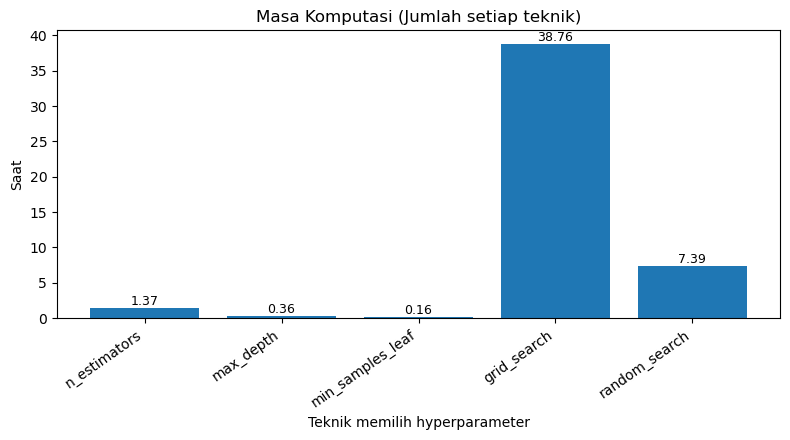

Figure saved as: C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\RF computation time.png


In [25]:
import pandas as pd
import matplotlib.pyplot as plt

RESULTS_XLSX = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\rf_tuning_results.xlsx"
df = pd.read_excel(RESULTS_XLSX)

one = df[df["Method"] == "One-at-a-time"].copy()

time_ne_total   = one.loc[one["Tuned"] == "n_estimators", "Time_sec"].sum()
time_md_total   = one.loc[one["Tuned"] == "max_depth", "Time_sec"].sum()
time_leaf_total = one.loc[one["Tuned"] == "min_samples_leaf", "Time_sec"].sum()

time_grid = df.loc[df["Method"] == "GridSearchCV", "Time_sec"].min()
time_rand = df.loc[df["Method"] == "RandomizedSearchCV", "Time_sec"].min()

approaches = ["n_estimators", "max_depth", "min_samples_leaf", "grid_search", "random_search"]
times = [time_ne_total, time_md_total, time_leaf_total, time_grid, time_rand]

plt.figure(figsize=(8, 4.5))
bars = plt.bar(approaches, times)
plt.ylabel("Saat")
plt.xlabel("Teknik memilih hyperparameter")
plt.title("Masa Komputasi (Jumlah setiap teknik)")
plt.xticks(rotation=35, ha="right")

# add value labels
for b in bars:
    plt.text(
        b.get_x() + b.get_width()/2,
        b.get_height(),
        f"{b.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()

# ===============================
# SAVE FIGURE (IMPORTANT PART)
# ===============================
OUT_PNG = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\RF computation time.png"
plt.savefig(OUT_PNG, dpi=300, bbox_inches="tight")

plt.show()

print(f"Figure saved as: {OUT_PNG}")


In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# =========================
# 0) SETTINGS (EDIT IF NEEDED)
# =========================
file_path = r"C:\Users\User\anaconda_projects\afb71b28-e26e-43d4-acf6-f548a18ed1c1\Objective4(1).xlsx"

YEAR_COL = "tahun"              # edit if needed
X1_COL   = "PC1"                # edit if needed
X2_COL   = "PC2"                # edit if needed
Y_COL    = "Pelepasan Karbon (tons)"   # edit if needed

TRAIN_END_YEAR = 2017           # training: 2000–2017
TEST_START_YEAR = 2018          # test: 2018–2021

# =========================
# 1) LOAD DATA
# =========================
df = pd.read_excel(file_path)
df.columns = df.columns.str.strip()
df = df.sort_values(YEAR_COL).reset_index(drop=True)

# Split: Train (<=2017), Test (>=2018)
df_train = df[df[YEAR_COL] <= TRAIN_END_YEAR].copy()
df_test  = df[df[YEAR_COL] >= TEST_START_YEAR].copy()

print("Train years:", df_train[YEAR_COL].min(), "-", df_train[YEAR_COL].max(), "| n =", len(df_train))
print("Test years :", df_test[YEAR_COL].min(),  "-", df_test[YEAR_COL].max(),  "| n =", len(df_test))

# =========================
# 2) METRIC FUNCTION
# =========================
def regression_metrics(y_true, y_pred):
    mse  = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mse, rmse, mae, mape

# =========================
# 3) ROLLING-ORIGIN CV (EXPANDING WINDOW) ON TRAIN SET
# =========================
years_train = sorted(df_train[YEAR_COL].unique())
print("\nTraining years for CV:", years_train)

fold_results = []

# RF model settings (sane defaults; tune later if you want)
rf_params = dict(
    n_estimators=10,
    random_state=42,
    max_depth=3,
    min_samples_leaf=2

)

for i in range(1, len(years_train)):
    val_year    = years_train[i]
    train_years = years_train[:i]  # expanding window
    
    fold_train = df_train[df_train[YEAR_COL].isin(train_years)]
    fold_val   = df_train[df_train[YEAR_COL] == val_year]
    
    X_train_fold = fold_train[[X1_COL, X2_COL]]
    y_train_fold = fold_train[Y_COL]
    
    X_val_fold = fold_val[[X1_COL, X2_COL]]
    y_val_fold = fold_val[Y_COL]
    
    rf = RandomForestRegressor(**rf_params)
    rf.fit(X_train_fold, y_train_fold)
    
    y_val_pred_fold = rf.predict(X_val_fold)
    mse, rmse, mae, mape = regression_metrics(y_val_fold, y_val_pred_fold)
    
    fold_results.append({
        "val_year": val_year,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "mape": mape
    })

cv_df = pd.DataFrame(fold_results)
print("\nRolling-Origin CV Results (Validation on Next Year):")
display(cv_df)

# =========================
# SAVE CV RESULTS
# =========================
cv_output_path = "RF_ExpandingWindow_Validation_Results.csv"
cv_df.to_csv(cv_output_path, index=False)
print(f"Rolling-origin CV results saved to: {cv_output_path}")

print("\nVALIDATION MODEL PERFORMANCE (Average across folds):")
print("Mean RMSE:", cv_df["rmse"].mean())
print("Mean MAE :", cv_df["mae"].mean())
print("Mean MAPE:", cv_df["mape"].mean())
print("Mean MSE :", cv_df["mse"].mean())

# =========================
# 4) FIT FINAL RF MODEL ON FULL TRAIN SET
# =========================
X_train_final = df_train[[X1_COL, X2_COL]]
y_train_final = df_train[Y_COL]

final_rf = RandomForestRegressor(**rf_params)
final_rf.fit(X_train_final, y_train_final)

# =========================
# 5) TRAINING METRICS
# =========================
y_train_pred = final_rf.predict(X_train_final)
mse_train, rmse_train, mae_train, mape_train = regression_metrics(y_train_final, y_train_pred)

print("\n=== RF TRAINING PERFORMANCE (2000–2017) ===")
print("MSE  :", mse_train)
print("RMSE :", rmse_train)
print("MAE  :", mae_train)
print("MAPE :", mape_train, "%")

# =========================
# 6) TEST METRICS (2018–2021)
# =========================
X_test_final = df_test[[X1_COL, X2_COL]]
y_test_final = df_test[Y_COL]

y_test_pred = final_rf.predict(X_test_final)
mse_test, rmse_test, mae_test, mape_test = regression_metrics(y_test_final, y_test_pred)

print("\n=== RF FINAL TEST PERFORMANCE (2018–2021) ===")
print("MSE  :", mse_test)
print("RMSE :", rmse_test)
print("MAE  :", mae_test)
print("MAPE :", mape_test, "%")

# =========================
# SAVE SUMMARY METRICS
# =========================
summary_df = pd.DataFrame({
    "Dataset": ["Training (2000–2017)", "Validation (2001–2017)", "Test (2018–2021)"],
    "RMSE": [
        rmse_train,
        cv_df["rmse"].mean(),
        rmse_test
    ],
    "MAE": [
        mae_train,
        cv_df["mae"].mean(),
        mae_test
    ],
    "MAPE (%)": [
        mape_train,
        cv_df["mape"].mean(),
        mape_test
    ],
    "MSE": [
        mse_train,
        cv_df["mse"].mean(),
        mse_test
    ]
})

summary_output_path = "RF_Model_Performance_Summary.csv"
summary_df.to_csv(summary_output_path, index=False)
print(f"Performance summary saved to: {summary_output_path}")




=== ACTUAL vs PREDICTED (TEST DATA) ===


,Year,Actual_Carbon,Predicted_Carbon_RF,Error (Actual - Predicted)
18,2018,252064870,2.373826e+08,1.468230e+07
19,2019,254423360,2.373826e+08,1.704079e+07
20,2020,252065080,2.406219e+08,1.144322e+07
21,2021,260591310,2.406219e+08,1.996945e+07


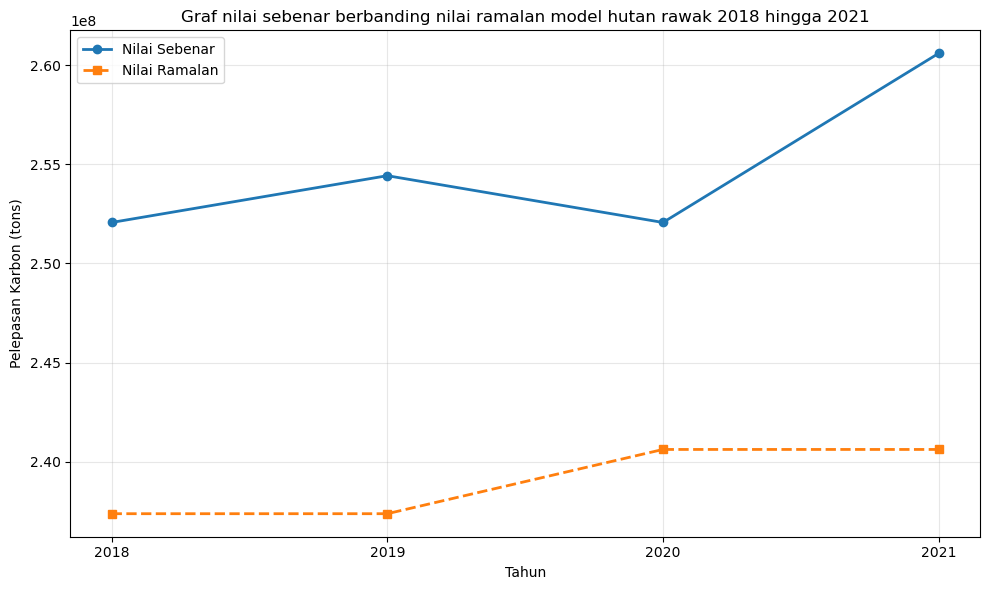

Saved:
- RF_Actual_vs_Predicted_Test.csv
- RF_Actual_vs_Predicted_Test.png


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1) PREDICT ON TEST DATA
# =========================
X_test_final = df_test[[X1_COL, X2_COL]]
y_test_actual = df_test[Y_COL]
y_test_pred   = final_rf.predict(X_test_final)

# =========================
# 2) CREATE COMPARISON TABLE
# =========================
comparison_df = pd.DataFrame({
    "Year": df_test[YEAR_COL],
    "Actual_Carbon": y_test_actual,
    "Predicted_Carbon_RF": y_test_pred,
    "Error (Actual - Predicted)": y_test_actual - y_test_pred
})

print("\n=== ACTUAL vs PREDICTED (TEST DATA) ===")
display(comparison_df)

# Save table
comparison_df.to_csv("RF_Actual_vs_Predicted_Test.csv", index=False)

# =========================
# 3) PLOT ACTUAL vs PREDICTED
# =========================
plt.figure(figsize=(10, 6))

plt.plot(
    comparison_df["Year"],
    comparison_df["Actual_Carbon"],
    marker="o",
    linewidth=2,
    label="Nilai Sebenar"
)

plt.plot(
    comparison_df["Year"],
    comparison_df["Predicted_Carbon_RF"],
    marker="s",
    linestyle="--",
    linewidth=2,
    label="Nilai Ramalan"
)

# 🔹 FORCE integer years on x-axis
plt.xticks(comparison_df["Year"].astype(int))

plt.xlabel("Tahun")
plt.ylabel("Pelepasan Karbon (tons)")
plt.title("Graf nilai sebenar berbanding nilai ramalan model hutan rawak 2018 hingga 2021")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("RF_Actual_vs_Predicted_Test.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved:")
print("- RF_Actual_vs_Predicted_Test.csv")
print("- RF_Actual_vs_Predicted_Test.png")


,Year,Actual,Predicted_RF,Predicted_MLR
0,2018,252064870,2.373826e+08,2.705406e+08
1,2019,254423360,2.373826e+08,2.752840e+08
2,2020,252065080,2.406219e+08,2.501696e+08
3,2021,260591310,2.406219e+08,2.625268e+08


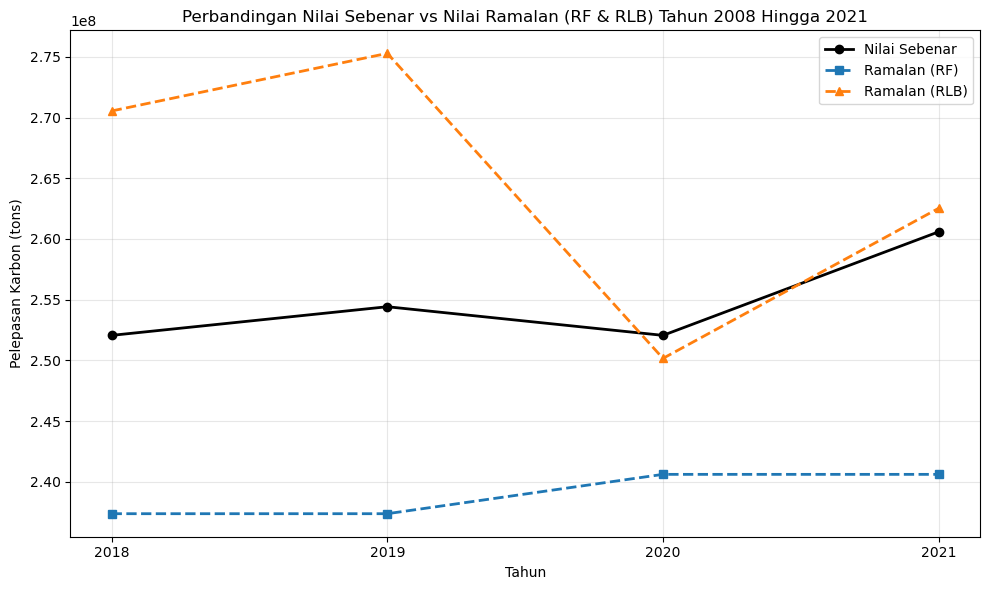

Saved:
- Combined_RF_MLR_Comparison.csv
- Combined_Actual_vs_RF_vs_MLR.png


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

#perbandingan MLR dan RF
comparison_rf = comparison_df[["Year", "Actual_Carbon", "Predicted_Carbon_RF"]].copy()
comparison_rf = comparison_rf.rename(columns={
    "Actual_Carbon": "Actual",
    "Predicted_Carbon_RF": "Predicted_RF"
})

comparison_mlr = comparison_test[["Year", "Predicted"]].copy()
comparison_mlr = comparison_mlr.rename(columns={"Predicted": "Predicted_MLR"})

# Merge by Year (keeps only years that exist in both)
combined = pd.merge(comparison_rf, comparison_mlr, on="Year", how="inner")

# Optional: round for nice table/csv
combined = combined.round(4)
display(combined)
combined.to_csv("Combined_RF_MLR_Comparison.csv", index=False)

# -------------------------------------------------
# 2) Plot combined graph
# -------------------------------------------------
plt.figure(figsize=(10, 6))

plt.plot(
    combined["Year"], combined["Actual"],
    marker="o", linewidth=2,
    label="Nilai Sebenar", color="black"
)

plt.plot(
    combined["Year"], combined["Predicted_RF"],
    marker="s", linestyle="--", linewidth=2,
    label="Ramalan (RF)"
)

plt.plot(
    combined["Year"], combined["Predicted_MLR"],
    marker="^", linestyle="--", linewidth=2,
    label="Ramalan (RLB)"
)

# 🔹 Force integer years
plt.xticks(combined["Year"].astype(int))

plt.xlabel("Tahun")
plt.ylabel("Pelepasan Karbon (tons)")
plt.title("Perbandingan Nilai Sebenar vs Nilai Ramalan (RF & RLB) Tahun 2008 Hingga 2021")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("Combined_Actual_vs_RF_vs_MLR.png", dpi=300, bbox_inches="tight")
plt.show()

print("Saved:")
print("- Combined_RF_MLR_Comparison.csv")
print("- Combined_Actual_vs_RF_vs_MLR.png")
